# Data analysis project of Space Missions

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [33]:
%pip install iso3166


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [35]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [36]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [38]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [39]:
#Delete nonimportant columns
df = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

#Change the date to uniform format
df['Date_transformed'] = pd.to_datetime(df['Date'])
df['Date_transformed'] = df['Date_transformed'].astype(str)
df["Date_transformed"] = df["Date_transformed"].str.slice(0,10)
df['Date_transformed'] = pd.to_datetime(df['Date_transformed'])


# Remove ',' from Price column
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

# Locate the duplicated rows
duplicated = df.duplicated(['Date_transformed','Detail'], keep=False)
df.loc[duplicated]


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date_transformed
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success,2008-11-05
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success,2008-11-05


In [40]:
# Drop the duplicated row
df.drop_duplicates(subset=['Date_transformed','Detail'], inplace=True)
df.info()
# There is 1 less row in the dataframe. The duplicated one. This is correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Organisation      4323 non-null   object        
 1   Location          4323 non-null   object        
 2   Date              4323 non-null   object        
 3   Detail            4323 non-null   object        
 4   Rocket_Status     4323 non-null   object        
 5   Price             963 non-null    float64       
 6   Mission_Status    4323 non-null   object        
 7   Date_transformed  4323 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 304.0+ KB


## Descriptive Statistics

In [41]:
df.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [42]:

# Get a DataFrame with organisations and their count of starts
organisation_count = df['Organisation'].value_counts()

# Filter the DataFrame based on counts greater than 10
filtered_df = df[df['Organisation'].isin(organisation_count[organisation_count > 10].index)]

<Axes: xlabel='count', ylabel='Organisation'>

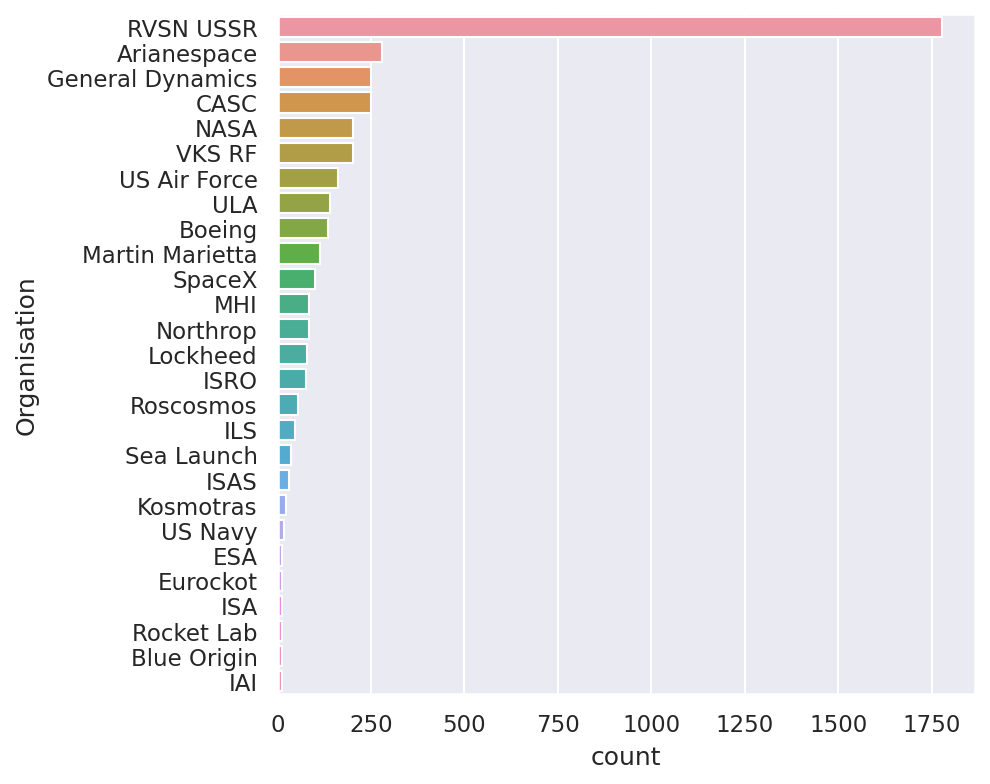

In [43]:

plt.figure(figsize=(6, 6), dpi=150)
sns.countplot(data=filtered_df, y='Organisation', order=filtered_df['Organisation'].value_counts().index)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<Axes: xlabel='Rocket_Status', ylabel='count'>

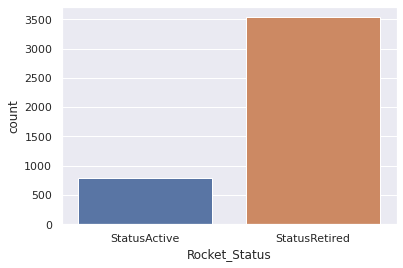

In [44]:
sns.countplot(data=df, x='Rocket_Status')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

<Axes: xlabel='Mission_Status', ylabel='Percent'>

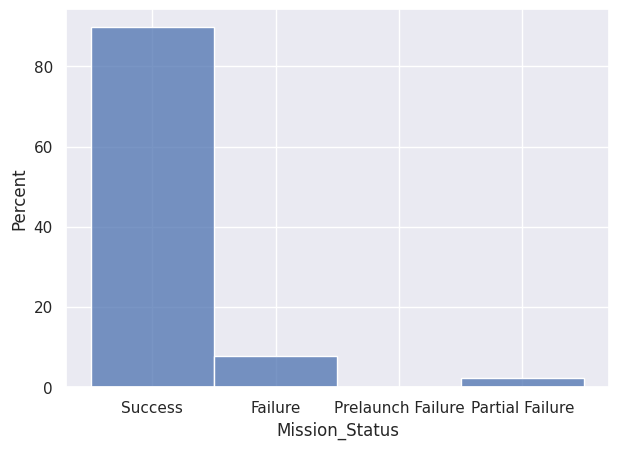

In [45]:
plt.figure(figsize=(7, 5), dpi=100)

sns.histplot(data=df, x='Mission_Status', stat="percent")

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

(0.0, 500.0)

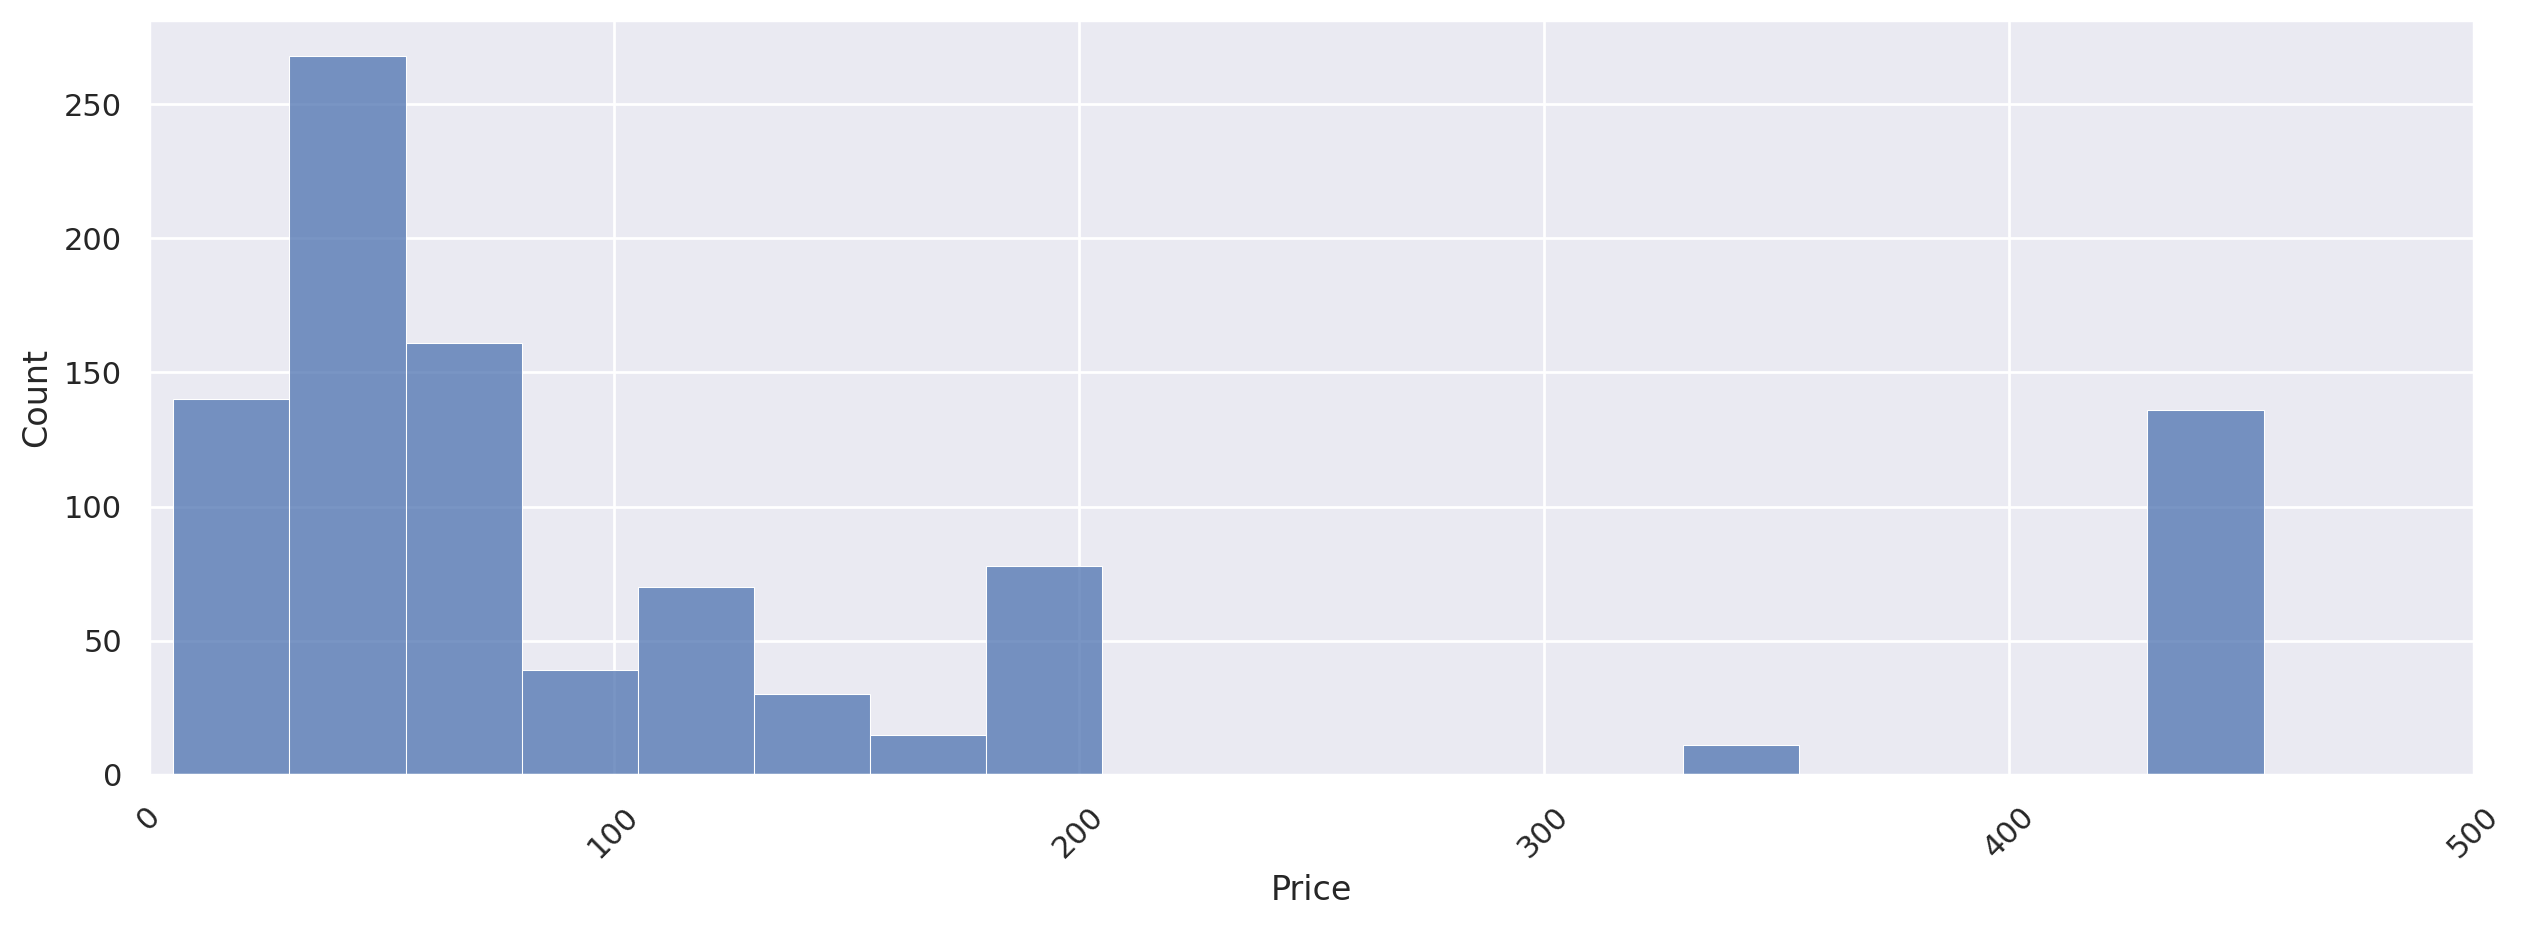

In [46]:

df_price_only = df[~df['Price'].isna()].sort_values('Price')
plt.figure(figsize=(15, 5), dpi=200)
sns.set(style="darkgrid")
sns.histplot(data=df_price_only, x='Price',kde=False, bins=200)
plt.xticks(rotation=45)

# Show only values that are less than $500 mil
plt.xlim(0, 500)

## Show a list of launches that cost more than $500 mil

In [47]:
df_price_more_500 = df_price_only[df_price_only["Price"]>500]
df_price_more_500

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date_transformed
3716,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Nov 09, 1967 12:00 UTC",Saturn V | Apollo 4,StatusRetired,"1,160.00",Success,1967-11-09
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success,1969-11-14
3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.00",Partial Failure,1968-04-04
3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.00",Success,1973-05-14
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.00",Success,1972-12-19
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.00",Success,1968-12-21
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.00",Success,1972-04-16
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.00",Success,1969-03-03
3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Jul 26, 1971 13:34 UTC",Saturn V | Apollo 15,StatusRetired,"1,160.00",Success,1971-07-26
3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.00",Success,1971-01-31


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [48]:
#Create a new column country by deleting everytjing before the last comma in Location column
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

#Replace some counrties names
country_map = {'Russia': 'Russian Federation',
               'New Mexico': 'United States of America',
               'Yellow Sea': 'China',
               'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
               'Pacific Missile Range Facility': 'United States of America',
               'Pacific Ocean': 'United States of America',
               'Barents Sea': 'Russian Federation',
               'Gran Canaria': 'United States of America',
               'Iran': 'Iran, Islamic Republic of',
               'North Korea': "Korea, Democratic People's Republic of",
               'South Korea': 'Korea, Republic of',
               'USA': 'United States of America'}
df['Country'] = df['Country'].replace(country_map)
df["Code"] = df["Country"].apply(lambda x: countries.get(x).alpha3)

In [49]:
df['Country'].unique()

array(['United States of America', 'China', 'Kazakhstan', 'Japan',
 'Israel', 'New Zealand', 'Russian Federation',
 'Iran, Islamic Republic of', 'France', 'India',
 "Korea, Democratic People's Republic of", 'Korea, Republic of',
 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [50]:
launches = df.groupby("Code")["Country"].count().reset_index(name="Launches")
fig = px.choropleth(launches, locations="Code", color="Launches", title="Number of Rocket Launches by Country", color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country

In [51]:
succesful_launches_df = df[df['Mission_Status']== 'Failure']
succesful_launches = succesful_launches_df.groupby("Code")["Country"].count().reset_index(name="Failed Launches")
fig = px.choropleth(succesful_launches, locations="Code", color="Failed Launches", title="Number of Failed Rocket Launches by Country", color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [52]:

sunburst_countries_df = df.drop(df.columns.difference(['Country', 'Mission_Status']), axis=1)

fig = px.sunburst(sunburst_countries_df, path=["Country","Mission_Status"], color="Country")
fig.show()

In [53]:
sunburst_organisation_df = df.drop(df.columns.difference(['Organisation', 'Mission_Status']), axis=1)


fig = px.sunburst(sunburst_organisation_df, path=["Organisation","Mission_Status"], color="Organisation")
fig.show()

In [54]:
sunburst_org_count_df = df.drop(df.columns.difference(['Organisation', 'Country']), axis=1)
fig = px.sunburst(sunburst_org_count_df, path=['Country', 'Organisation'], color='Country')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [55]:
amount_spent = df_price_only.groupby('Organisation')['Price'].sum().sort_values(ascending=False).round(0)
amount_spent.head()

Organisation
NASA 76,280.00
Arianespace 16,345.00
ULA 14,798.00
RVSN USSR 10,000.00
CASC 6,311.00
Name: Price, dtype: float64

<Axes: ylabel='Organisation'>

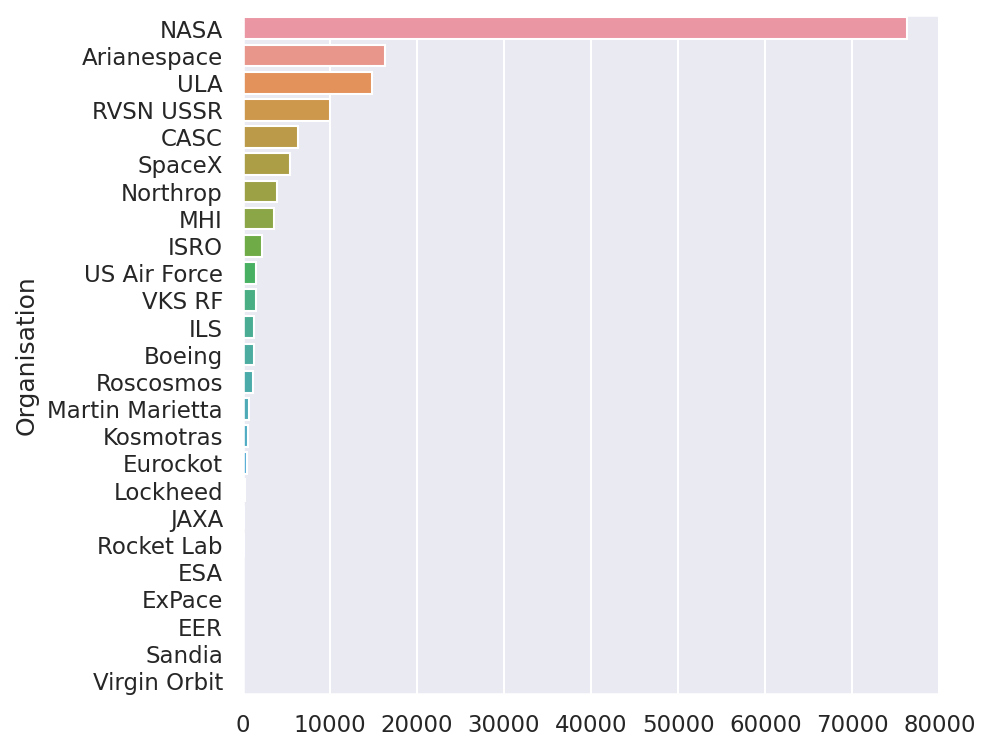

In [56]:
plt.figure(figsize=(6, 6), dpi=150)
sns.barplot(y=amount_spent.index, x=amount_spent.values)

# Analyse the Amount of Money Spent by Organisation per Launch

(0.0, 1220.0)

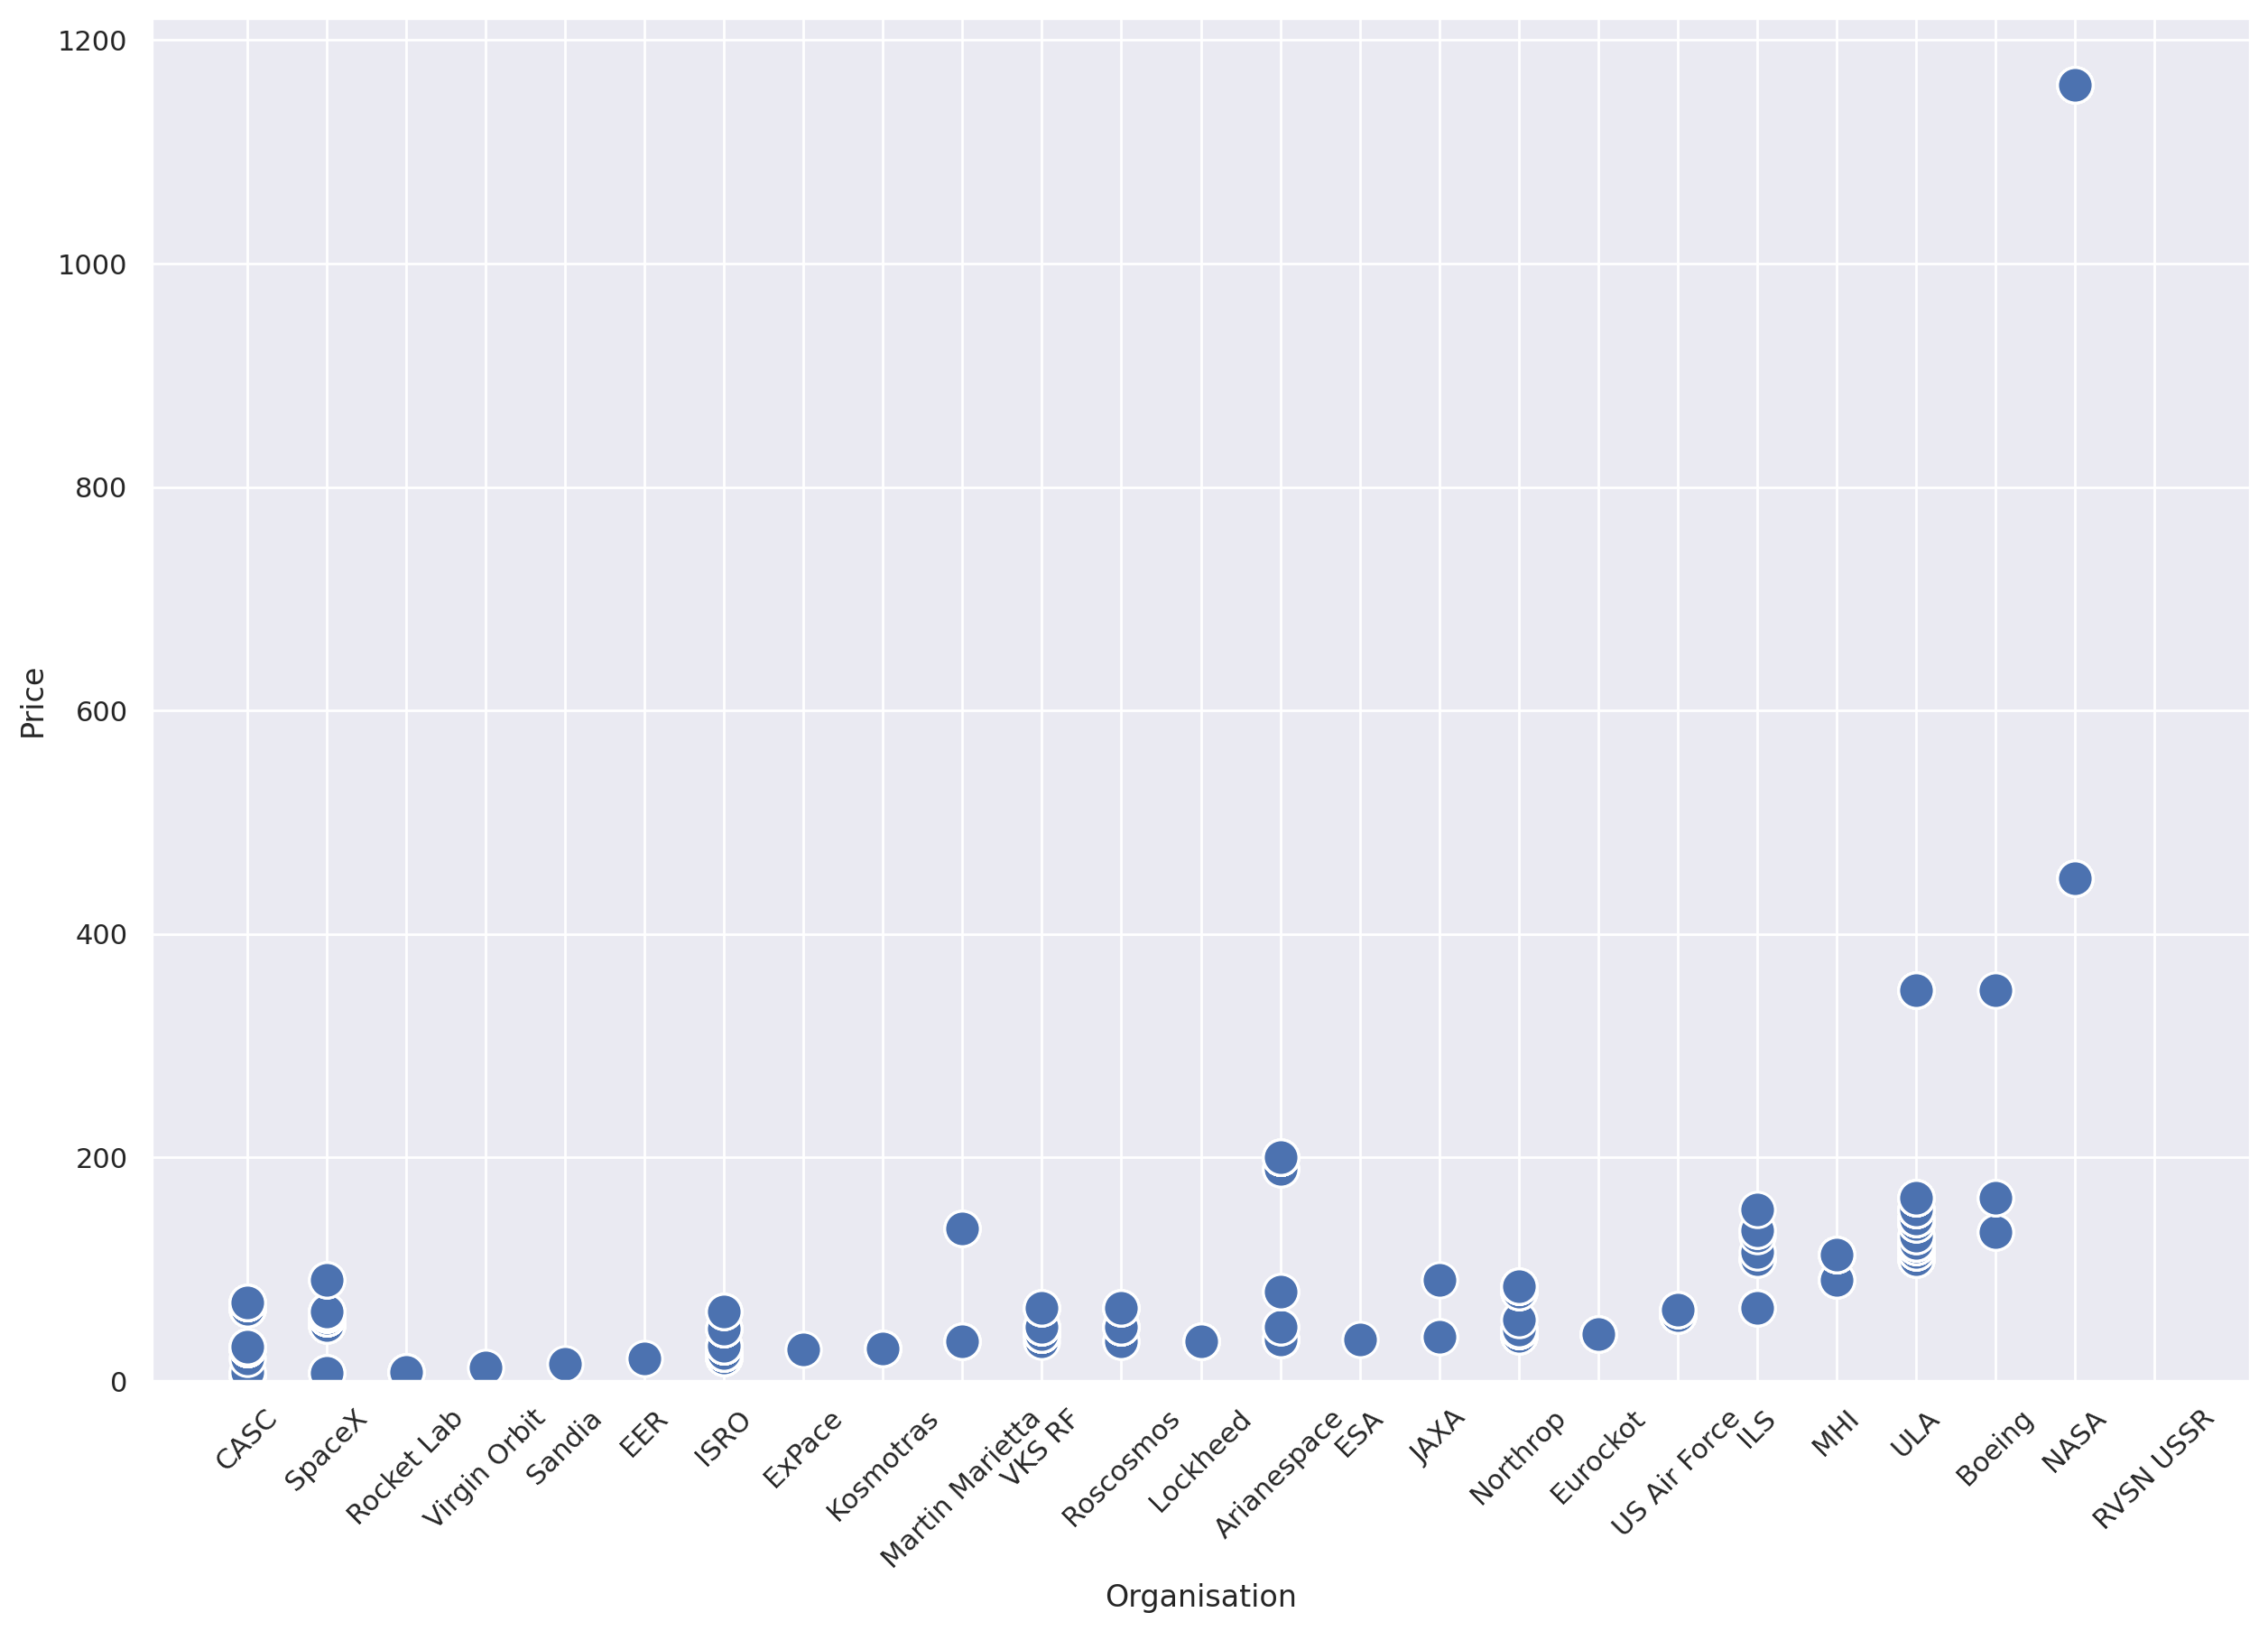

In [57]:
plt.figure(figsize=(15, 10), dpi=200)
sns.scatterplot(data=df_price_only, x='Organisation', y='Price', s=200)
plt.xticks(rotation=45)
plt.ylim(0, 1220)

## Average price for a launch per company

In [58]:
df_price_only.groupby('Organisation')['Price'].mean().sort_values(ascending=False).round(0)

Organisation
RVSN USSR 5,000.00
NASA 512.00
Boeing 177.00
Arianespace 170.00
ULA 151.00
ILS 102.00
MHI 95.00
Martin Marietta 80.00
US Air Force 60.00
JAXA 56.00
SpaceX 55.00
Roscosmos 52.00
Northrop 47.00
VKS RF 47.00
Eurockot 42.00
CASC 40.00
ESA 37.00
Lockheed 35.00
ISRO 32.00
Kosmotras 29.00
ExPace 28.00
EER 20.00
Sandia 15.00
Virgin Orbit 12.00
Rocket Lab 8.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

<Axes: xlabel='Date_transformed', ylabel='Count'>

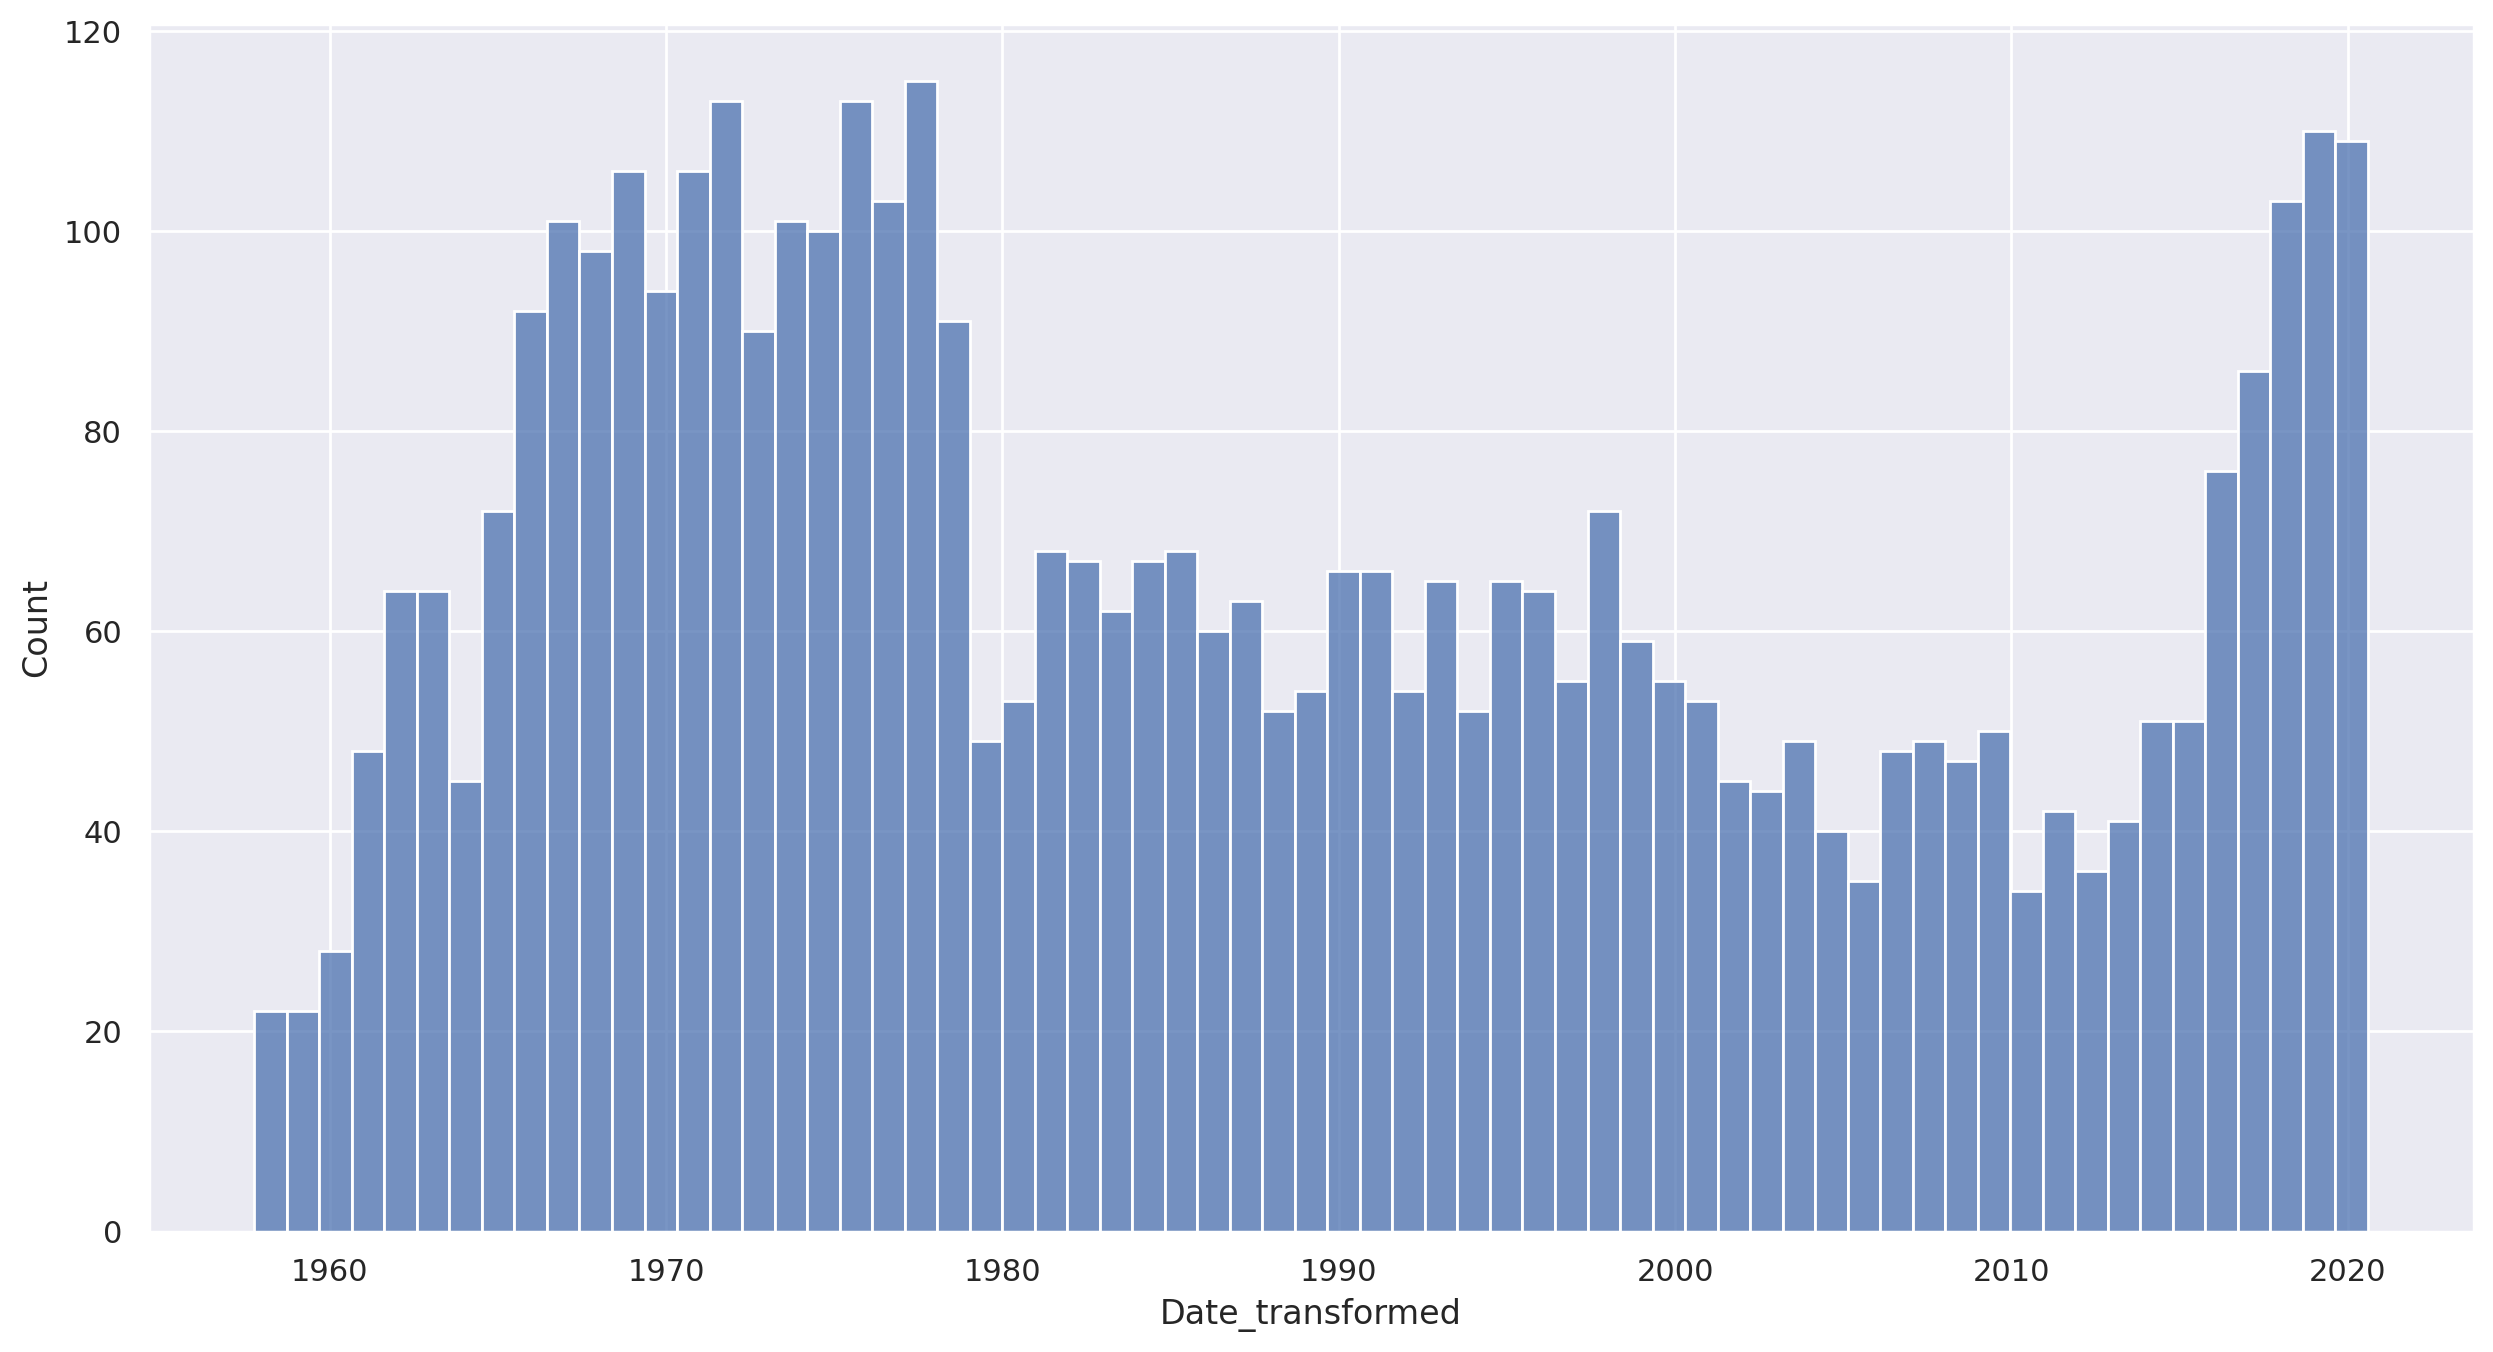

In [59]:
plt.figure(figsize=(15, 8), dpi=200)
sns.histplot(data=df, x='Date_transformed',kde=False, bins=65)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

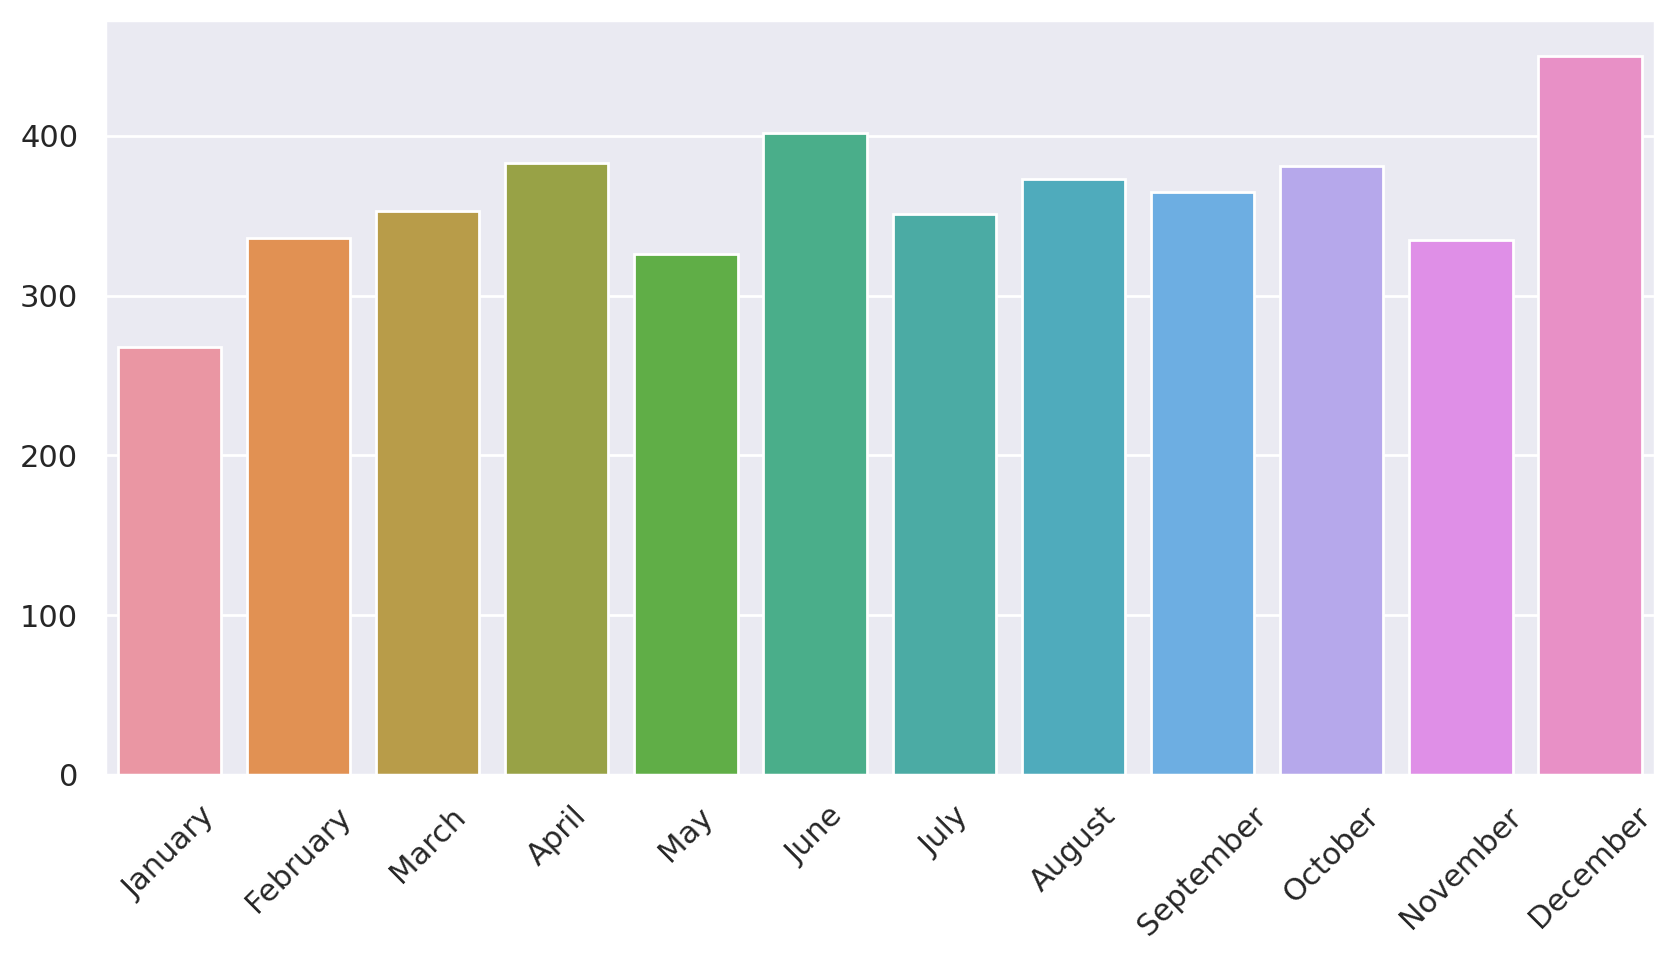

In [60]:
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']

df['Month_name'] = df['Date_transformed'].dt.month_name()
month_counts = df['Month_name'].value_counts().loc[sort_order]


plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xticks(rotation=45);

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

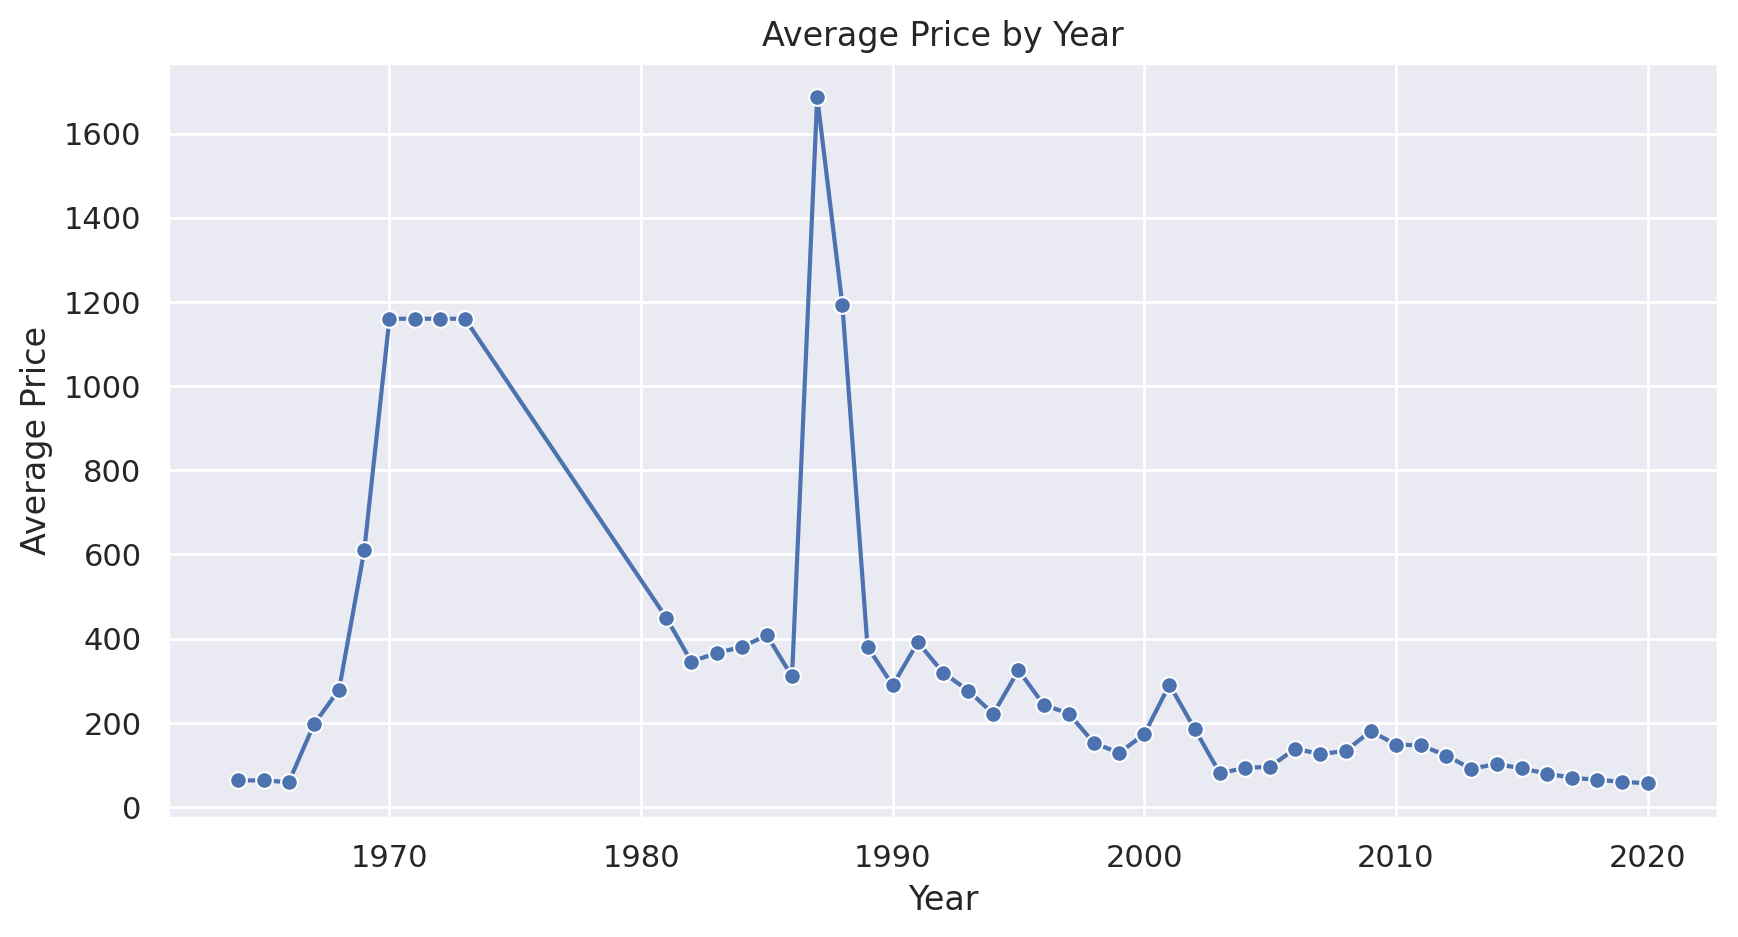

In [61]:
df_price_only['Year'] = df_price_only['Date_transformed'].dt.year
mean_price_by_year = df_price_only.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 5), dpi=200)
sns.lineplot(data=mean_price_by_year, x=mean_price_by_year.index,y= mean_price_by_year.values, marker='o', color='b')
plt.ylabel('Average Price')
plt.title('Average Price by Year');

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

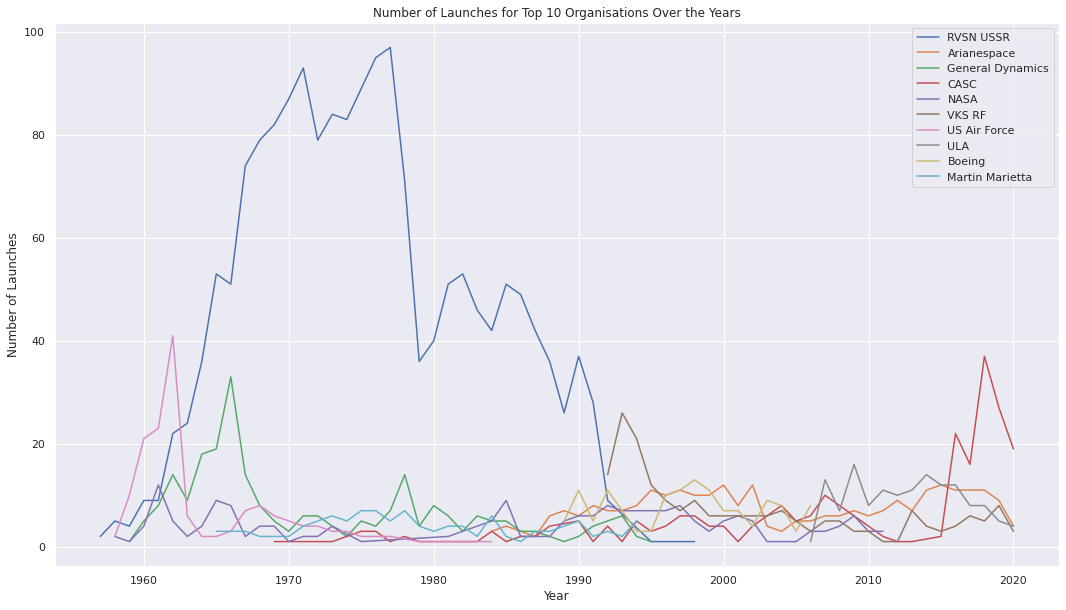

In [62]:

df['Year'] = df['Date_transformed'].dt.year

# Step 1: Get the top 10 organisations based on the number of occurrences (rows) in the dataframe.
top_10_organisations = df['Organisation'].value_counts().head(10).index.tolist()

# Step 2: Create a new dataframe containing only the rows corresponding to the top 10 organisations.
df_top_10 = df[df['Organisation'].isin(top_10_organisations)]

# Step 3: Group 'df_top_10' by 'Organisation' and 'Year' and count the number of occurrences (rows).
organisation_year_counts = df_top_10.groupby(['Organisation', 'Year']).size().reset_index()
organisation_year_counts.columns = ['Organisation', 'Year', 'Count']

# Step 4: Create a line chart with 10 lines (one for each organisation).
plt.figure(figsize=(18, 10))

for organisation in top_10_organisations:
    data = organisation_year_counts[organisation_year_counts['Organisation']==organisation]
    plt.plot(data['Year'], data['Count'], label=organisation)

# Step 5: Customize the plot (labels, title, etc.)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches for Top 10 Organisations Over the Years')
plt.legend()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [63]:
# Define a function to assign values to the 'Superpower' column based on country names
def assign_superpower(country):
    if country in ['Russian Federation', 'Kazakhstan']:
        return 'USSR'
    elif country in ['United States of America']:
        return 'USA'
    else:
        return None

# Create the 'Superpower' column using the custom function
df['Superpower'] = df['Country'].apply(assign_superpower)

#Select the correct years in which Cold war occured
df_cold_war = df[(df['Year'] >= 1947) & (df['Year'] <= 1991)]

# Create a new DataFrame by dropping rows where the 'Superpower' column is None
df_cold_war = df_cold_war.dropna(subset=['Superpower']).copy()
df_cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date_transformed,Country,Code,Month_name,Year,Superpower
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991-12-20,Kazakhstan,KAZ,December,1991,USSR
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1991-12-18,Russian Federation,RUS,December,1991,USSR
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991-12-07,United States of America,USA,December,1991,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1991-11-28,United States of America,USA,November,1991,USA
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1991-11-27,Russian Federation,RUS,November,1991,USSR


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [64]:
import plotly.graph_objects as go

# Calculate the value counts for each superpower
superpower_counts = df['Superpower'].value_counts()

# Create the Pie Chart
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=superpower_counts.index,
    values=superpower_counts.values,
    hole=0.3,))

# Update layout
fig.update_layout(
    title_text="Superpower Distribution",)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

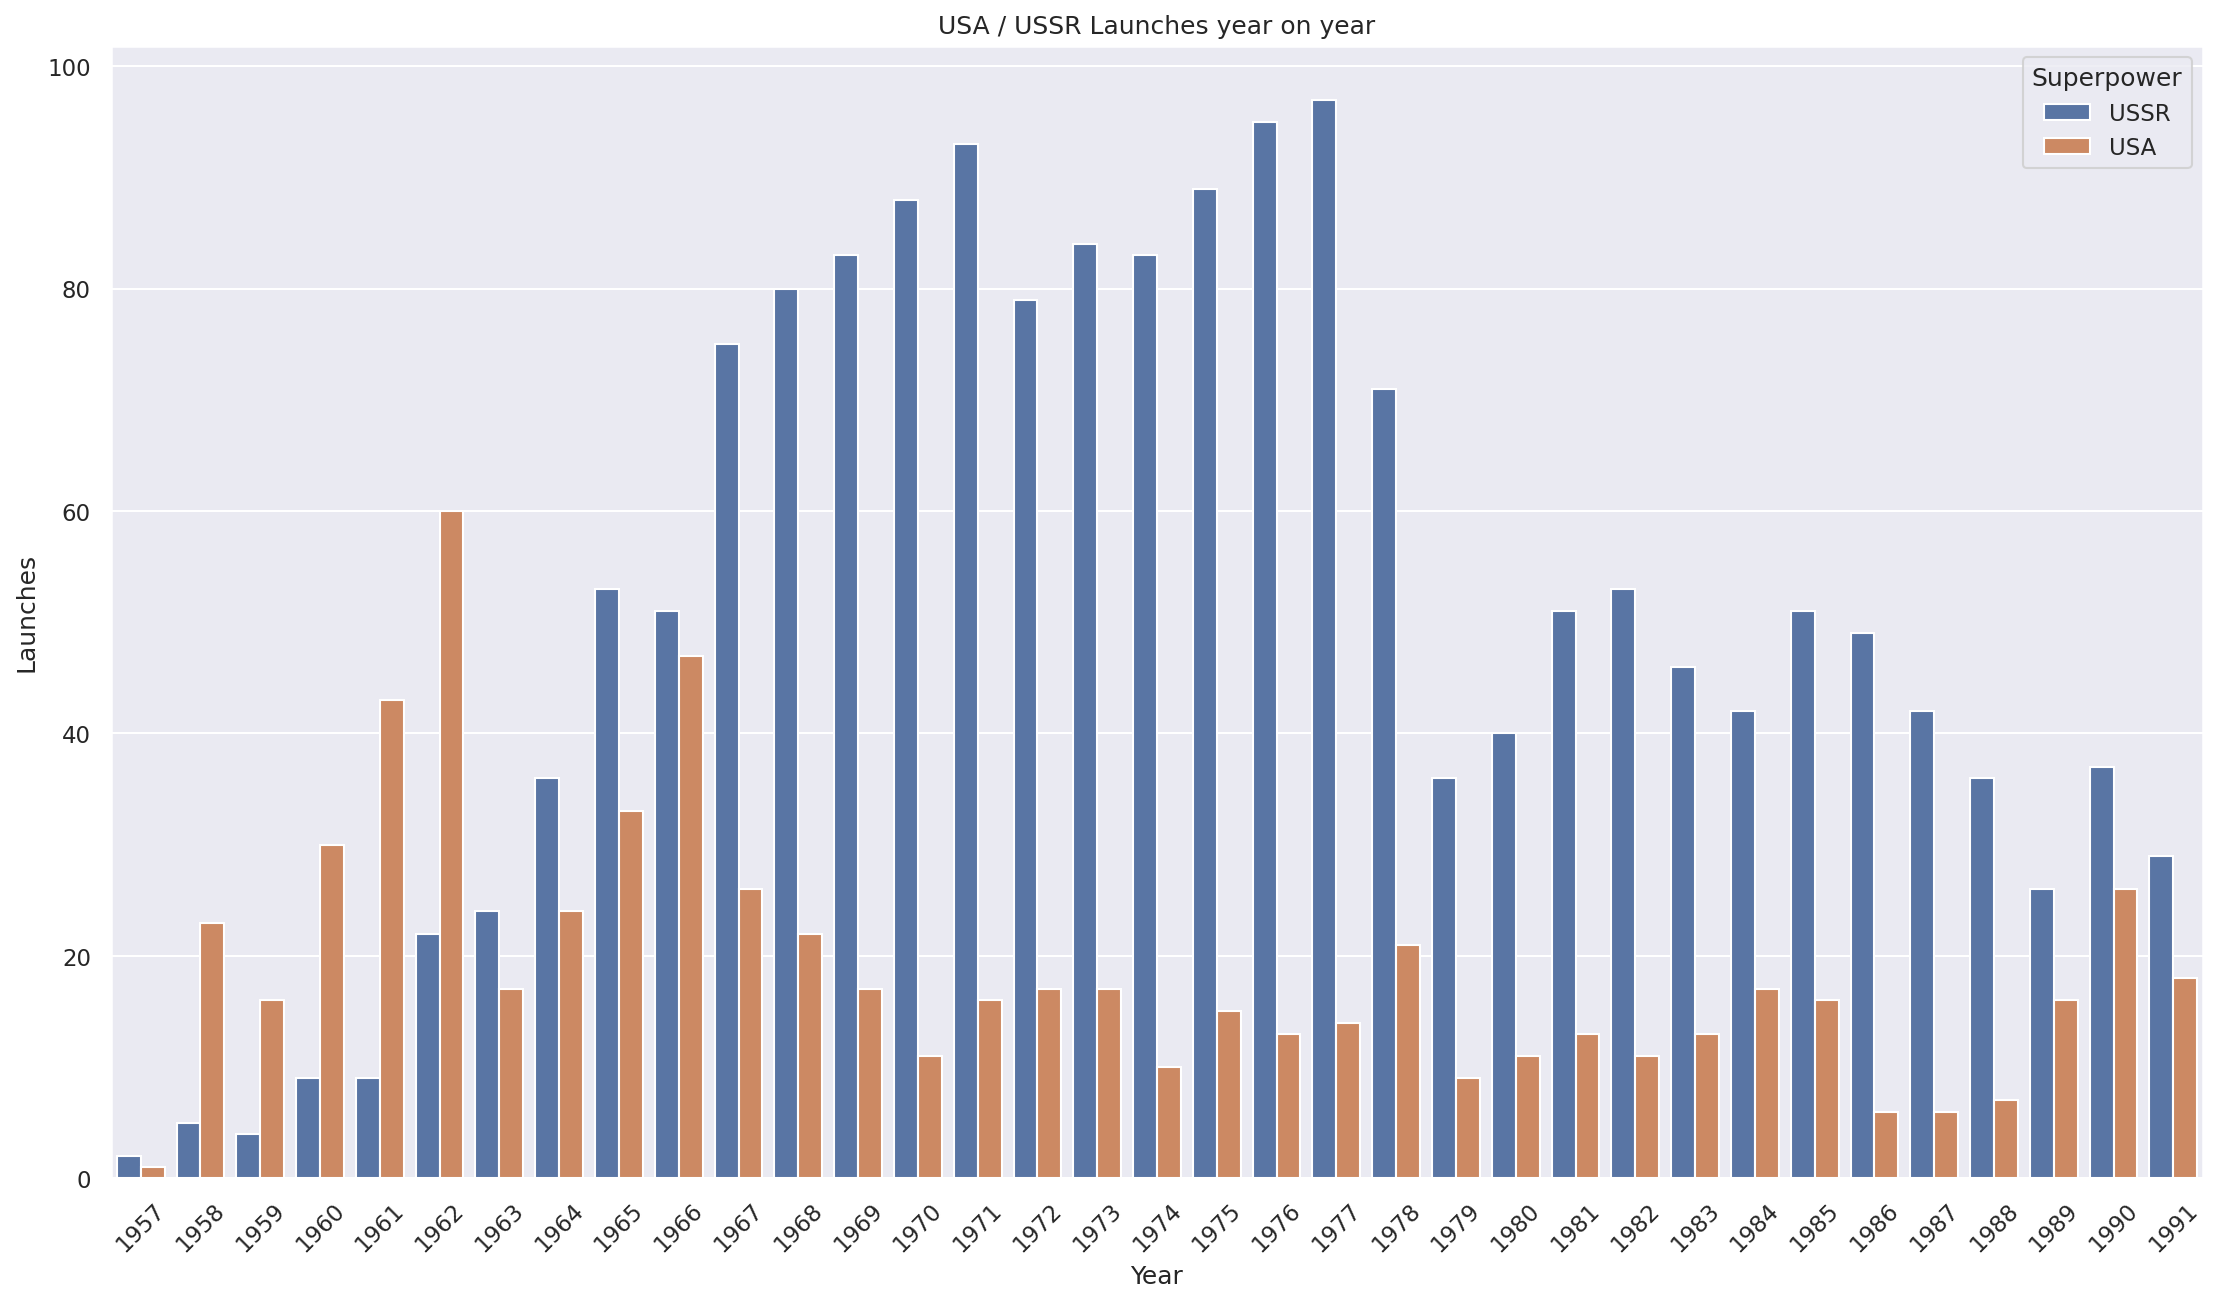

In [65]:
plt.figure(figsize=(18, 10), dpi=150)
sns.countplot(data=df_cold_war, x= 'Year', hue='Superpower')
plt.xticks(rotation=45)
plt.title("USA / USSR Launches year on year")
plt.ylabel("Launches");

## Chart the Total Number of Mission Failures Year on Year.

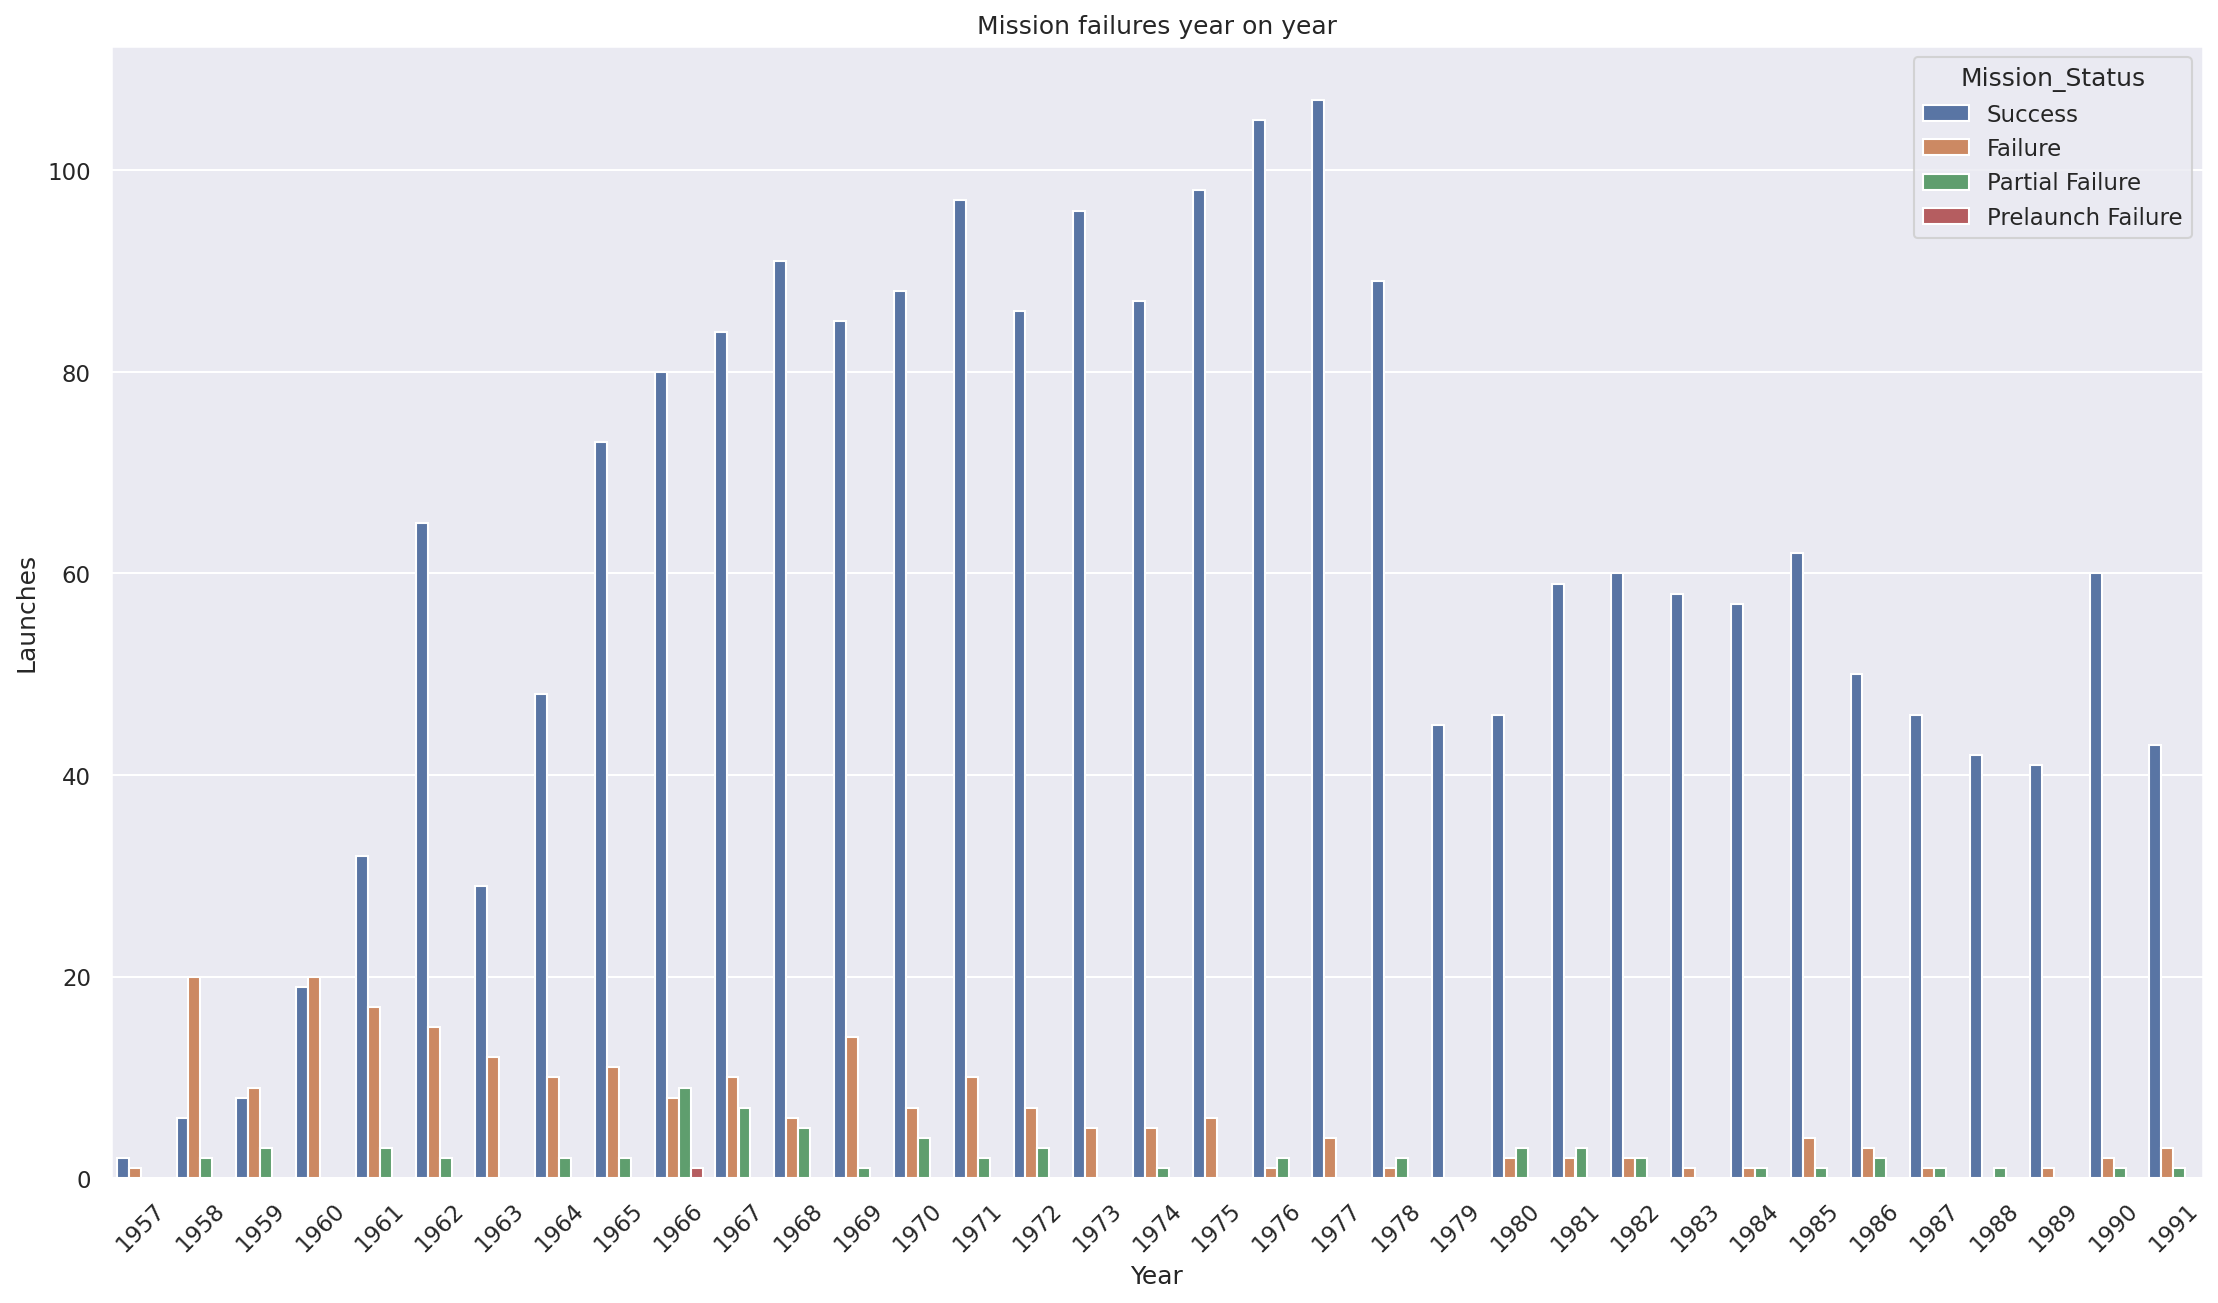

In [66]:
plt.figure(figsize=(18, 10), dpi=150)
sns.countplot(data=df_cold_war, x= 'Year', hue='Mission_Status')
plt.xticks(rotation=45)
plt.title("Mission failures year on year")
plt.ylabel("Launches");

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

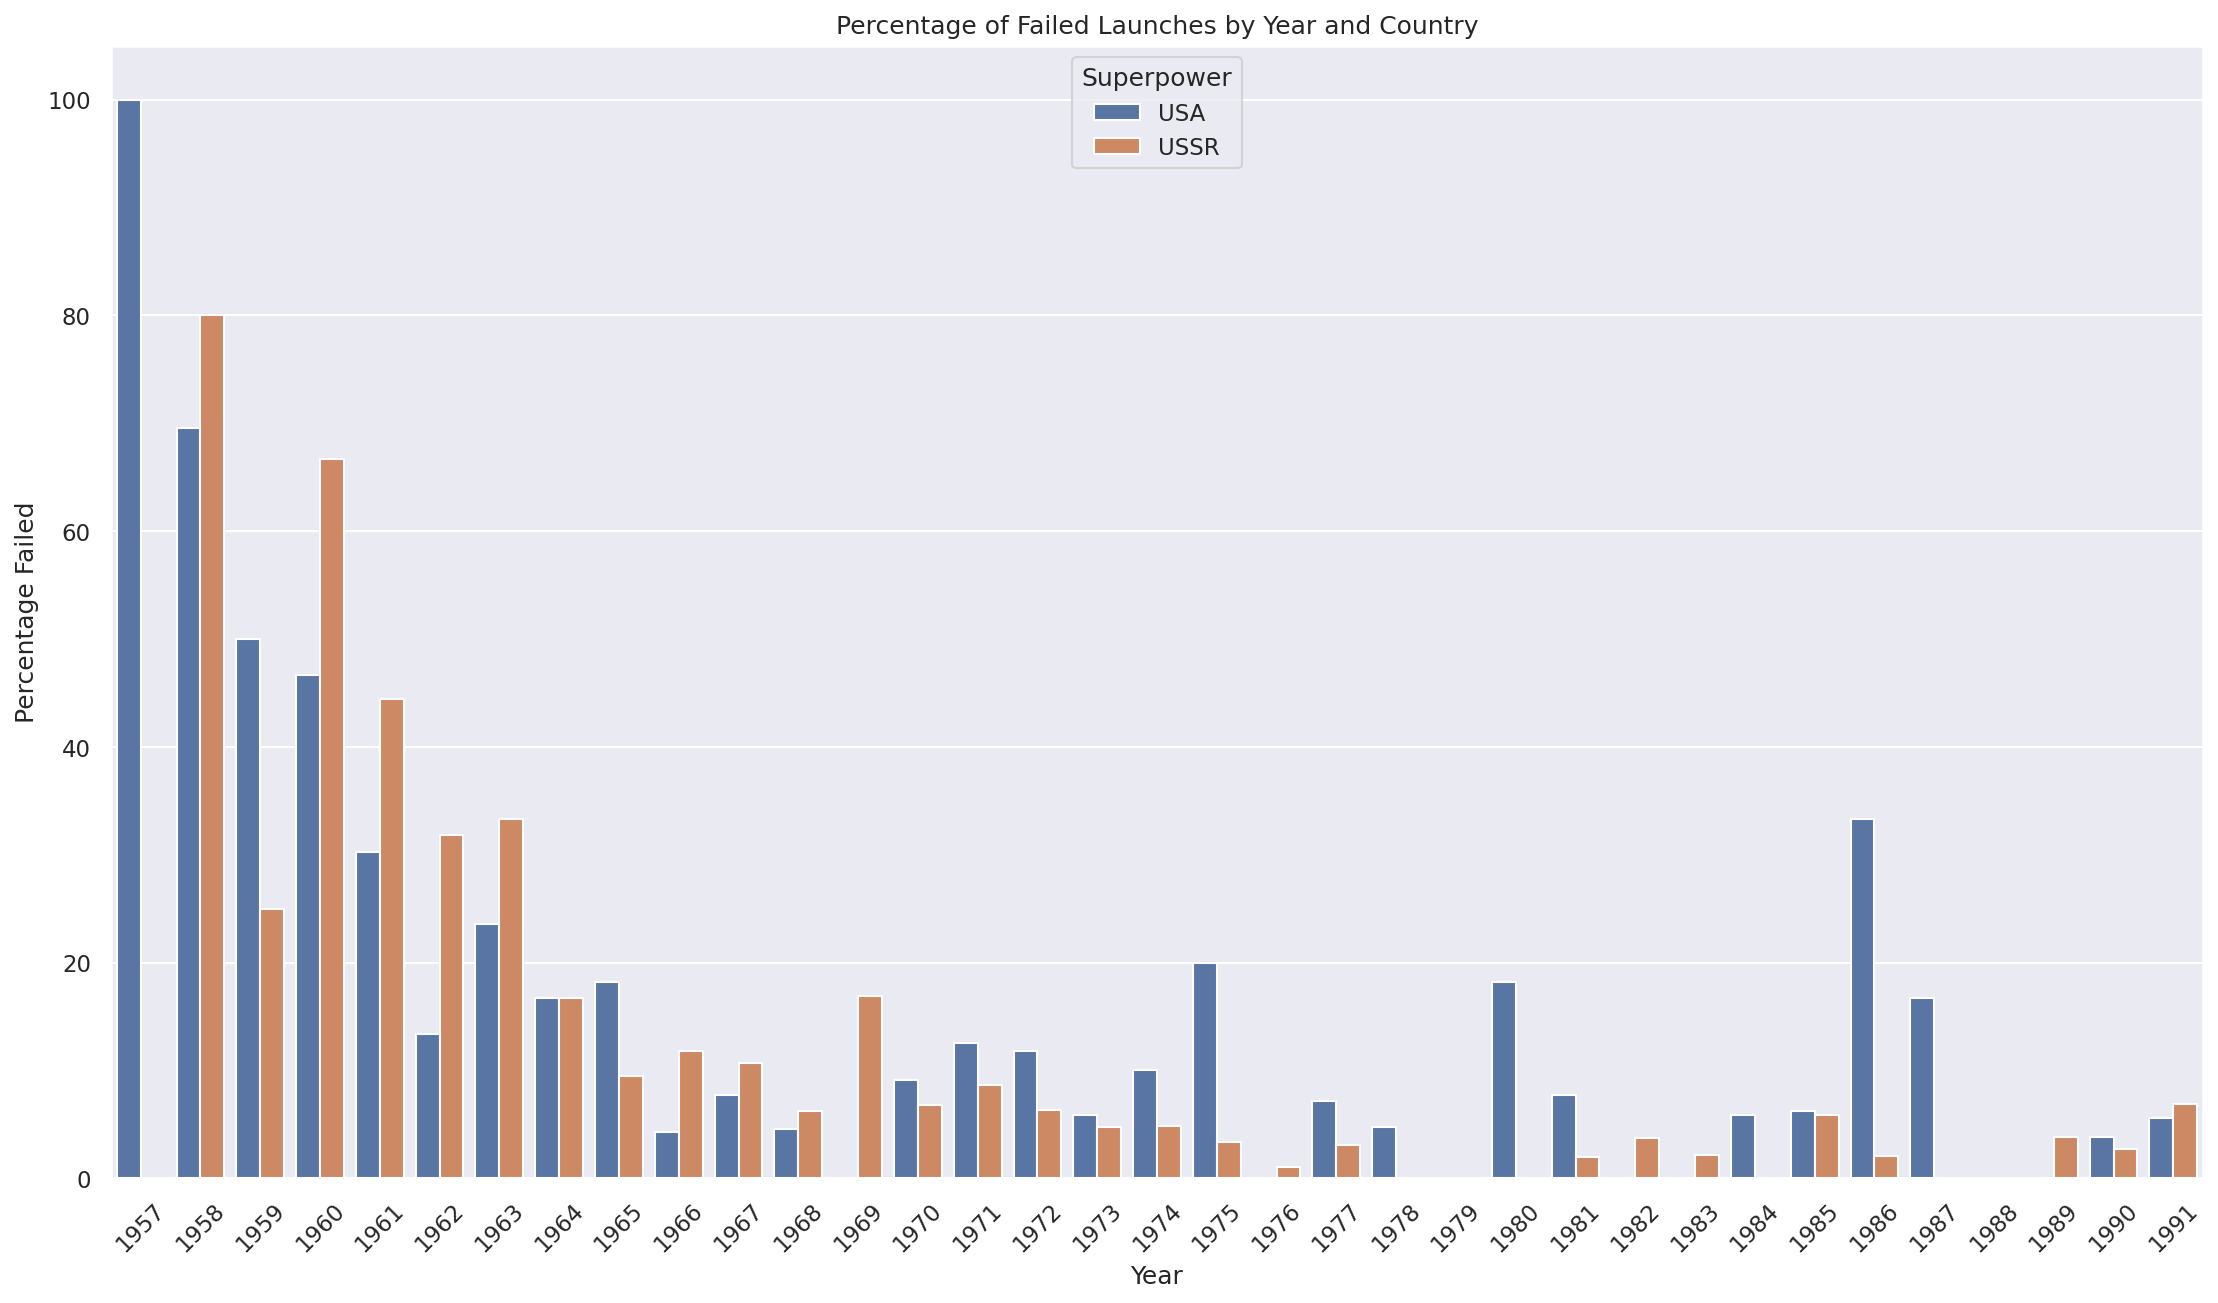

In [67]:
# Calculate the total number of launches per country for each year
launches_per_country_per_year = df_cold_war.groupby(['Year', 'Superpower']).size()

# Calculate the total number of failed launches per country for each year
failed_launches_per_country_per_year = df_cold_war[df_cold_war['Mission_Status'] == 'Failure'].groupby(['Year', 'Superpower']).size()

# Calculate the percentage of failed launches per country for each year
percentage_failed_launches_per_country_per_year = (failed_launches_per_country_per_year / launches_per_country_per_year) * 100

# Reset the index to convert the Series back to a DataFrame for Seaborn plotting
percentage_failed_launches_per_country_per_year = percentage_failed_launches_per_country_per_year.reset_index(name='Percentage Failed')


# Create the bar plot using Seaborn
plt.figure(figsize=(18, 10), dpi=150)
sns.barplot(x='Year', y='Percentage Failed', hue='Superpower', data=percentage_failed_launches_per_country_per_year)
plt.title("Percentage of Failed Launches by Year and Country")
plt.ylabel("Percentage Failed")
plt.xticks(rotation=45);

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [68]:
           
def chart_who_with_most_launches(df, who):

    #Make a new dataframe which will be plotted later
    most_launches_by_year = df.groupby('Year')[who].agg(lambda x: x.value_counts().idxmax()).reset_index(name='Most_Launches_Country')
    most_launches_by_year['Total_Launches_Per_Country_Per_Year'] = df.groupby(['Year', who])[who].transform('count')
    most_launches_by_year

    # Plotting the data using Seaborn
    plt.figure(figsize=(17, 8), dpi=150)
    sns.barplot(x='Year', y='Total_Launches_Per_Country_Per_Year', hue='Most_Launches_Country', data=most_launches_by_year, dodge=False)
    plt.xlabel('Year')
    plt.ylabel('Total Launches per year')  
    plt.legend(title='Country', loc='upper left', bbox_to_anchor=(0, 1))
    plt.xticks(rotation=90);

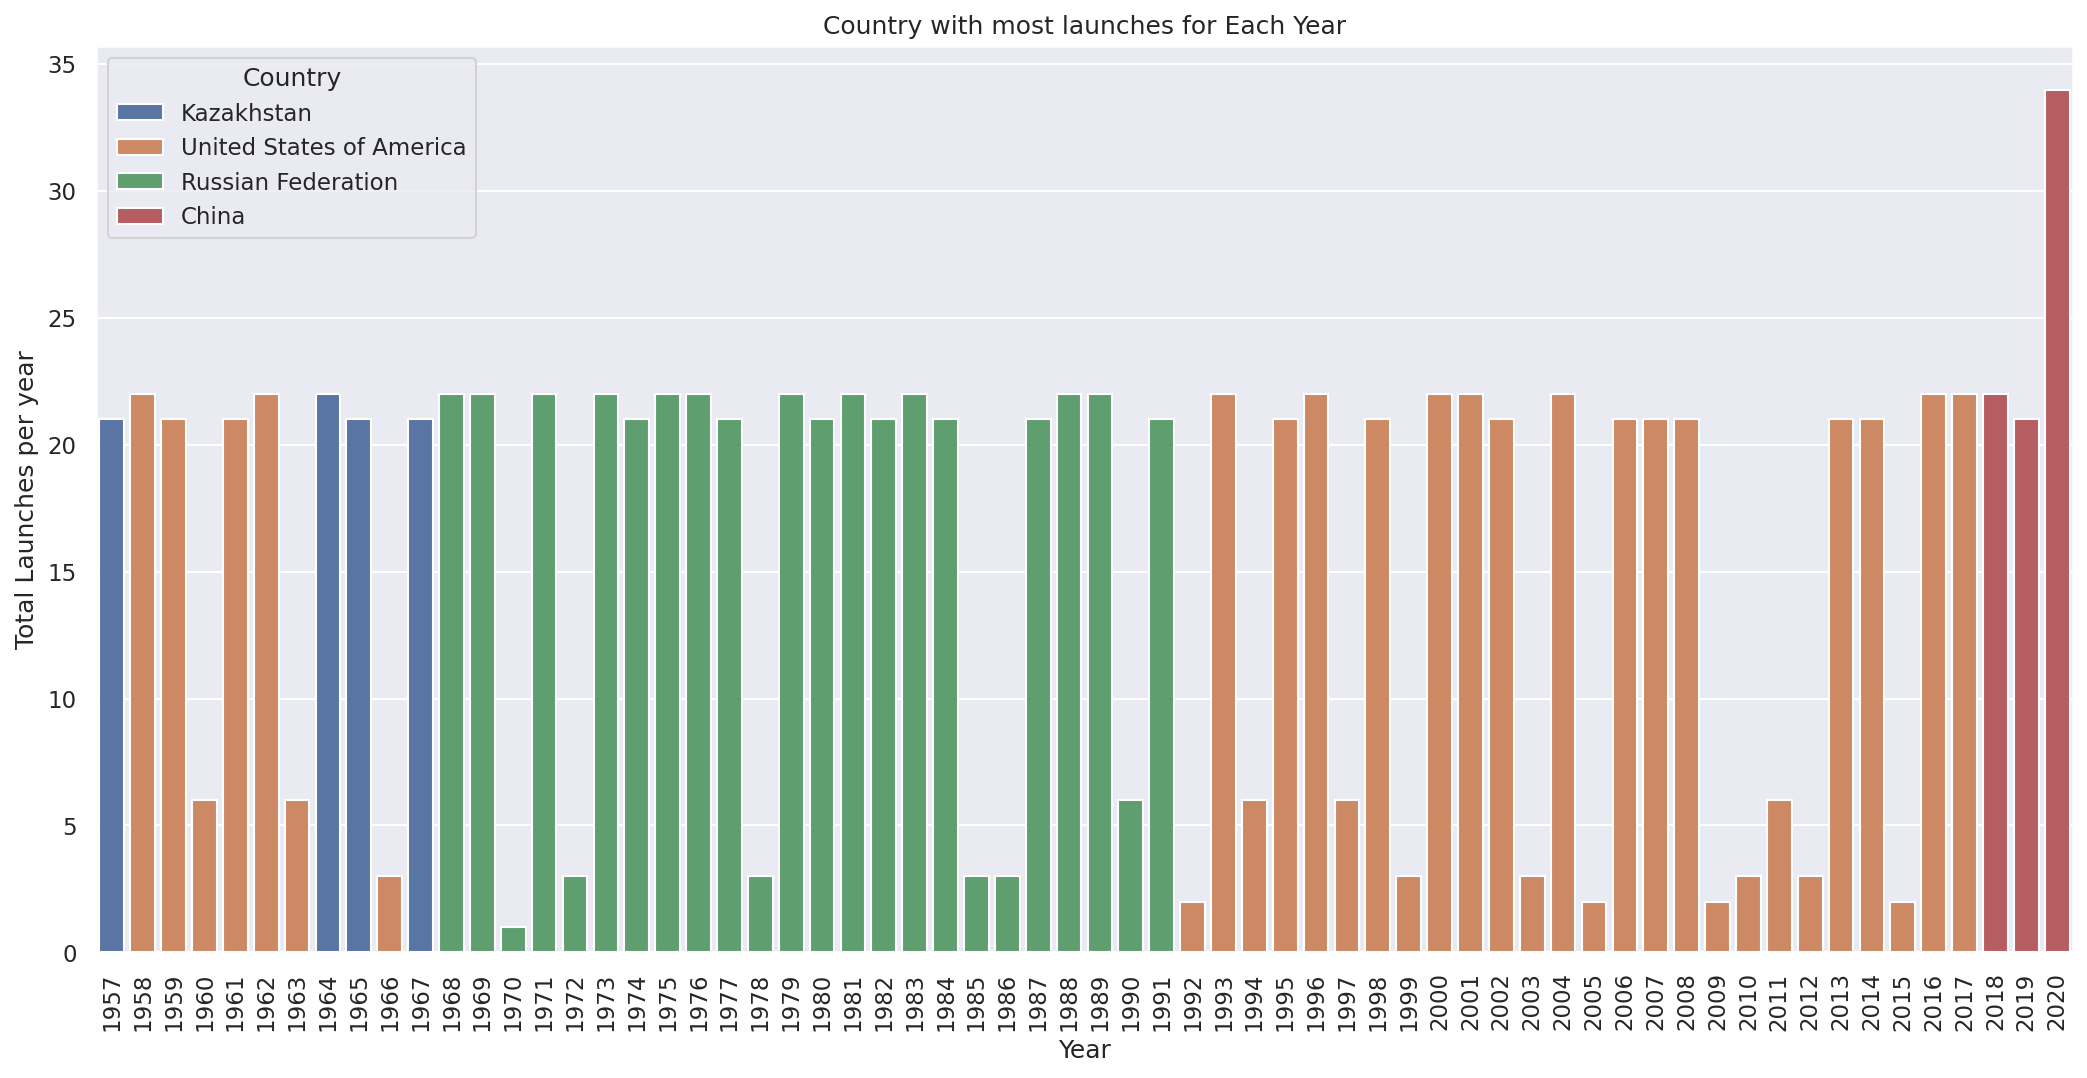

In [69]:
chart_who_with_most_launches(df, "Country")
plt.title('Country with most launches for Each Year');

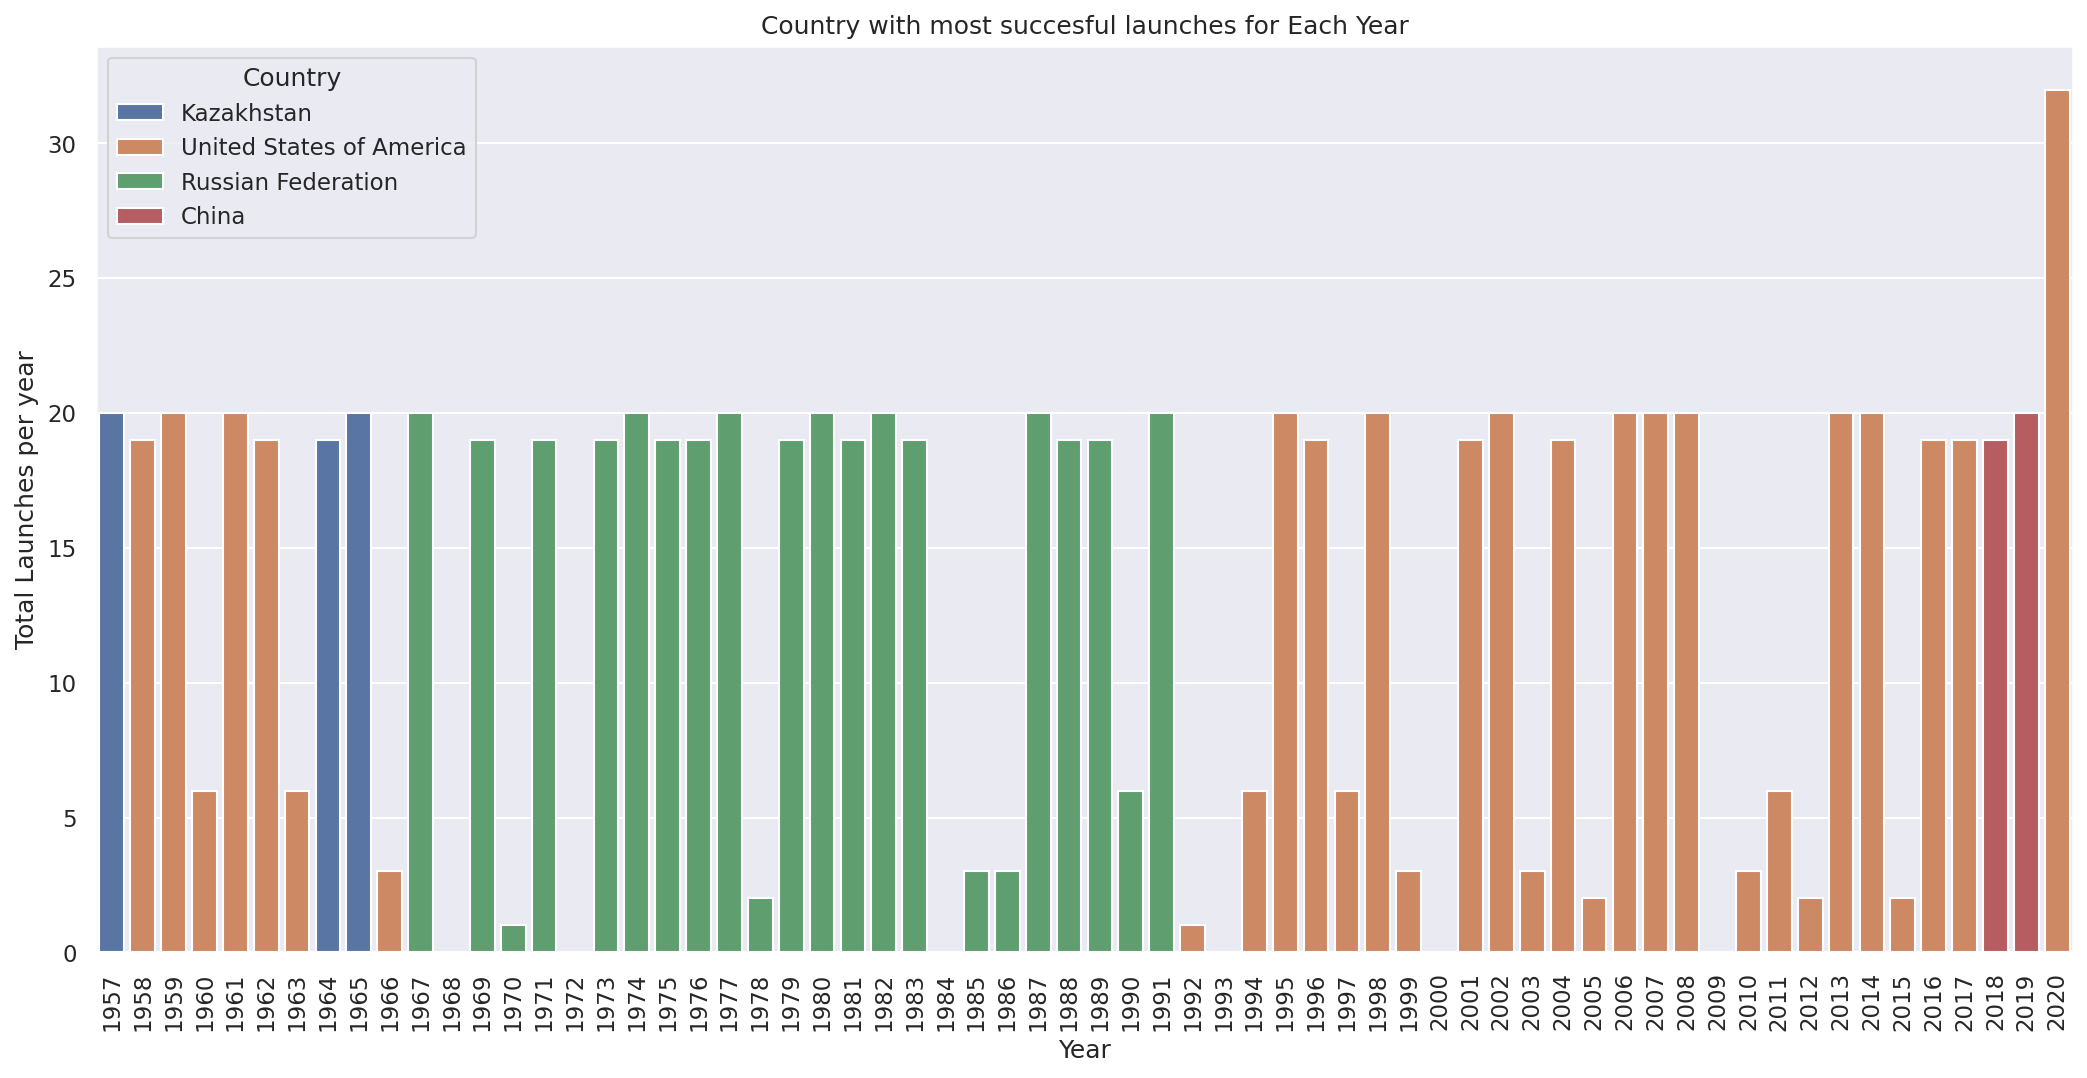

In [70]:
#Now make the same chart, this time with only succesful launchces
df_succesful = df[df['Mission_Status']=='Success']
chart_who_with_most_launches(df_succesful, 'Country')
plt.title('Country with most succesful launches for Each Year');

In [71]:
#The only difference is in year 2020, China had more launchces, but USA had more succesful launchces

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

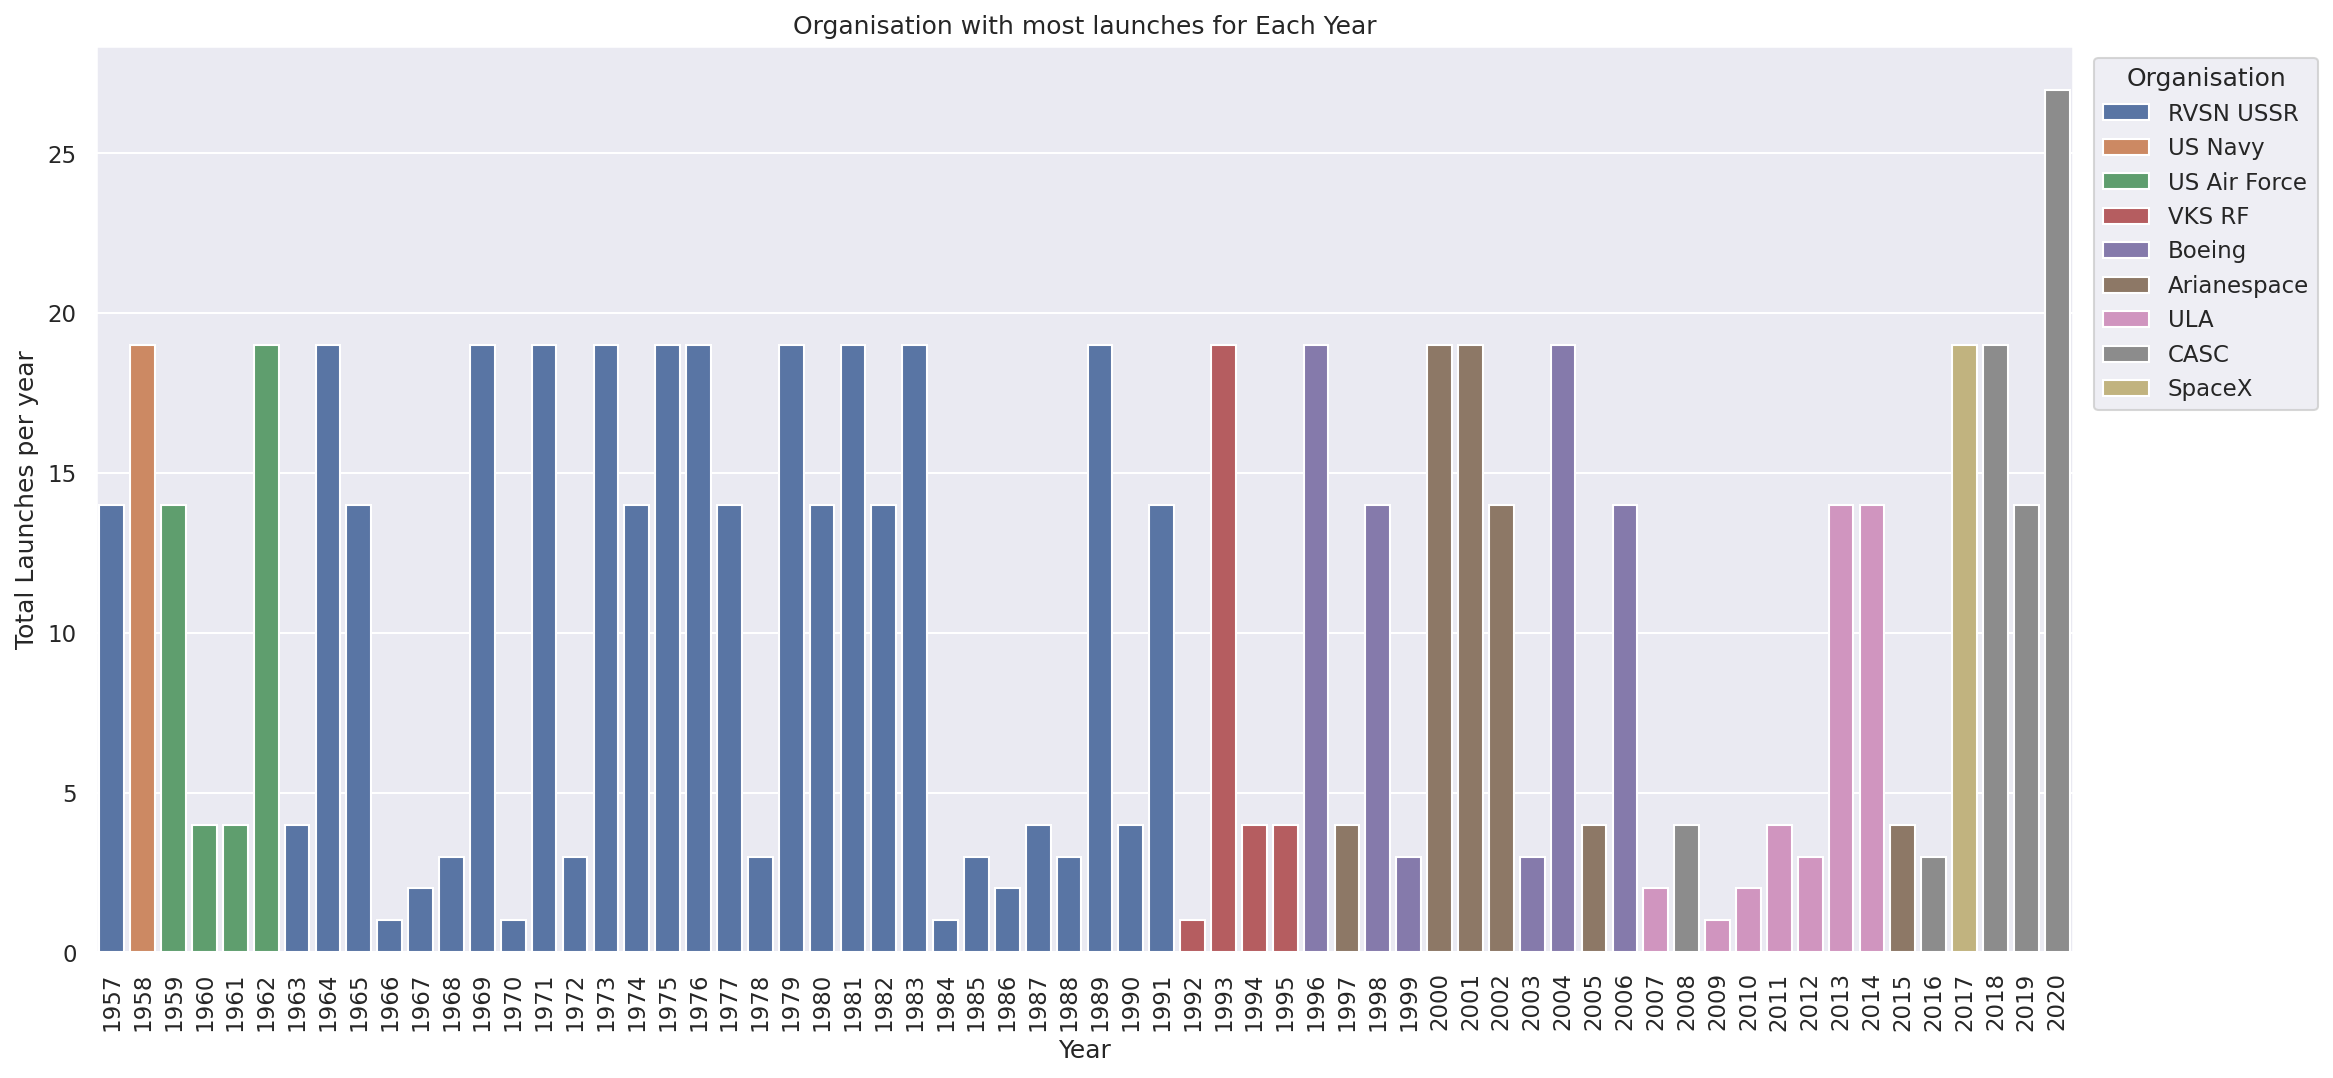

In [72]:
sns.set_style('darkgrid')
chart_who_with_most_launches(df, 'Organisation')
plt.legend(title='Organisation', loc='upper right', bbox_to_anchor=(1.13, 1))
plt.title('Organisation with most launches for Each Year');